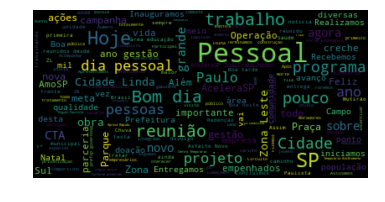

o nome oficial do jdoriajr é: João Doria
a descricao do jdoriajr é: Prefeito eleito com mais de 3 milhões de votos no 1º turno em SP. Jornalista e empresário.
o usuario jdoriajr tem 782220 seguidores no Twitter
o site do jdoriajr e None
urls utilizadas por jdoriajr:
https://www.pscp.tv/w/bOvqITFZTEVKTnhSTkFMRU58MWVhS2JxbFJXYWF4WEZdpv5uXDwQuiV1x5kWssULq2VV1Md1-BcYpakNdSA9
http://ww.abrale.org.br
https://goo.gl/69e8g8


In [80]:
###########################################
# Ferramenta de coleta de dados do Twitter
# Dados de um usuário e nuvem de palavras
# janeiro de 2018
# Curso do Knight Center
# Tweepy para acessar o Twitter
###########################################

#importanto coisas importantes
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

#cria uma api do twitter
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# QUE ARROBA VC ESTA PROCURANDO??
arroba = 'jdoriajr'

# CRIA NUVEM DE PALAVRAS
def nuvem_palavras(usuario):
    
    stopwords =  open("stopwords-br.txt","r").read()
    
    string = ''

    # pega a timeline de um usuário
    timeline = api.user_timeline(usuario, count=200, include_rts=False)
    
    #coloca os tweets na lista
    for tweet in timeline:
        tweetsemlink = re.sub(r"http\S+", "", str(tweet.text))#remove links de tweets
        string += str(tweetsemlink)
    
    #transforma uma str com vários tweets em lista de palavras
    wordList = re.sub("[^\w]", " ",  string).split()
    
    #remove as stopwords e coloca numa lista
    lista_filtrada = wordList[:] #make a copy of the word_list
    for palavra in wordList: # iterate over word_list
        if palavra.lower() in stopwords: #verifica as palavras usando caixa baixa
            lista_filtrada.remove(palavra) # remove word from filtered_word_list if it is 
    
    #junta tudo em uma string para montar uma lista de palavras
    string_final = ' '.join(lista_filtrada)
    
    #faz a nuvem de palavras  
    wordcloud = WordCloud(max_font_size=32).generate(string_final)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    wordcloud.to_file("nuvem"+ usuario + ".png")

###

def info_do_perfil(usuario):
    consulta_api = api.get_user(usuario)._json
    nome = consulta_api['name']
    descricao = consulta_api['description']
    seguidores = consulta_api['followers_count']
    site = consulta_api['url']
    
    #return seguidores
    frase = f'o usuario {usuario} tem {seguidores} seguidores no Twitter'
    frase2 = f'o nome oficial do {usuario} é: {nome}'
    frase3 = f'a descricao do {usuario} é: {descricao}'
    frase4 = f'o site do {usuario} e {site}'
    print(frase2)#nome
    print(frase3)#descricao
    print(frase)#seguidores
    print(frase4)#site
    
###

def links_na_timeline(usuario):
    
    timeline = api.user_timeline(usuario, count=200, include_rts=False)
    
    urls = []
    
    urls_de_RTs = []

    for tweet in timeline:

        lista_de_entidades = tweet.entities['urls']#acha urls na lista de entidades
        for i in lista_de_entidades:
            entidades = lista_de_entidades[0]
            url = entidades['expanded_url']
            if url.startswith('https://twitter.com'):
                urls_de_RTs.append(url)
            else:
                urls.append(url)
                
    texto = f'urls utilizadas por {usuario}:'
    print(texto)
    for url in urls:
        print(url)
    
####

nuvem_palavras(arroba)
info_do_perfil(arroba)
links_na_timeline(arroba)
